In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:02<00:00, 73.2MB/s]
100% 163M/163M [00:02<00:00, 73.1MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

In [ ]:
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1619.jpg', 'with_mask_596.jpg', 'with_mask_2062.jpg', 'with_mask_2311.jpg', 'with_mask_2196.jpg']
['with_mask_3538.jpg', 'with_mask_1848.jpg', 'with_mask_1384.jpg', 'with_mask_846.jpg', 'with_mask_3518.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3523.jpg', 'without_mask_3223.jpg', 'without_mask_2913.jpg', 'without_mask_2794.jpg', 'without_mask_1384.jpg']
['without_mask_499.jpg', 'without_mask_1784.jpg', 'without_mask_3076.jpg', 'without_mask_3537.jpg', 'without_mask_1103.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images
with mask --> 1
without mask --> 0



In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

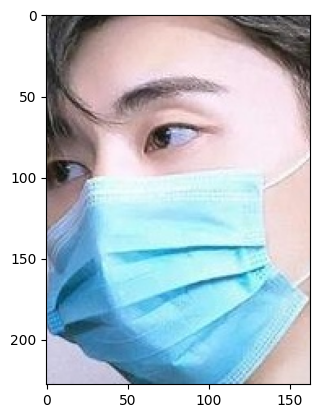

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

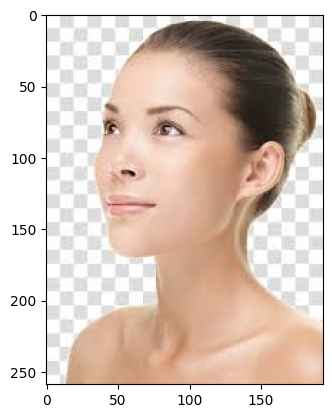

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

IMAGE PROCESSING:
Resize the Images

Convert the images to numpy arrays

In [ ]:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[ 94,  91,  74],
        [ 92,  89,  72],
        [ 86,  83,  66],
        ...,
        [147, 136, 120],
        [143, 134, 119],
        [141, 134, 118]],

       [[ 87,  84,  67],
        [ 88,  85,  68],
        [ 85,  82,  65],
        ...,
        [149, 138, 122],
        [145, 137, 121],
        [143, 136, 120]],

       [[ 77,  74,  57],
        [ 85,  82,  65],
        [ 85,  82,  65],
        ...,
        [146, 136, 119],
        [144, 136, 120],
        [142, 135, 119]],

       ...,

       [[ 40,  40,  28],
        [ 41,  41,  29],
        [ 41,  41,  29],
        ...,
        [127, 114,  95],
        [144, 132, 114],
        [146, 135, 117]],

       [[ 41,  41,  29],
        [ 40,  40,  28],
        [ 38,  38,  26],
        ...,
        [119, 106,  87],
        [137, 125, 107],
        [143, 132, 114]],

       [[ 39,  39,  27],
        [ 38,  38,  26],
        [ 37,  37,  25],
        ...,
        [106,  93,  74],
        [124, 112,  94],
        [142, 131, 113]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[  7,   6,   1],
        [  9,   8,   3],
        [ 13,  12,   7],
        ...,
        [133, 133, 131],
        [130, 130, 128],
        [124, 124, 122]],

       [[  7,   6,   1],
        [ 10,   9,   4],
        [ 14,  13,   8],
        ...,
        [112, 112, 110],
        [115, 115, 113],
        [110, 110, 108]],

       [[  7,   6,   1],
        [ 10,   9,   4],
        [ 14,  13,   9],
        ...,
        [ 97,  97,  95],
        [101, 101,  99],
        [ 96,  96,  94]],

       ...,

       [[ 41,  37,  40],
        [ 39,  35,  38],
        [ 37,  34,  36],
        ...,
        [ 45,  23,  15],
        [ 39,  20,  13],
        [ 35,  18,  11]],

       [[ 42,  37,  41],
        [ 41,  35,  40],
        [ 39,  35,  38],
        ...,
        [ 43,  25,  16],
        [ 38,  21,  14],
        [ 33,  17,  10]],

       [[ 41,  36,  40],
        [ 41,  36,  40],
        [ 40,  37,  39],
        ...,
        [ 43,  24,  16],
        [ 38,  21,  14],
        [ 32,  17,  10]]

In [ ]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.00392157],
        [0.        , 0.        , 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.01176471],
        [0.        , 0.        , 0.01176471],
        [0.        , 0.        , 0.01176471]],

       ...,

       [[0.00392157, 0.        , 0.        ],
        [0.00392157, 0.        , 0.        ],
        [0.00392157, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

NameError: ignored

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 141s 822ms/step - loss: 0.4707 - acc: 0.7844 - val_loss: 0.2877 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 133s 783ms/step - loss: 0.2842 - acc: 0.8876 - val_loss: 0.2658 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 125s 737ms/step - loss: 0.2251 - acc: 0.9095 - val_loss: 0.2393 - val_acc: 0.9174
Epoch 4/5
170/170 [==============================] - 127s 747ms/step - loss: 0.1898 - acc: 0.9244 - val_loss: 0.2374 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 130s 767ms/step - loss: 0.1595 - acc: 0.9375 - val_loss: 0.2187 - val_acc: 0.9306


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 196ms/step - loss: 0.2190 - acc: 0.9166
Test Accuracy = 0.9166114926338196


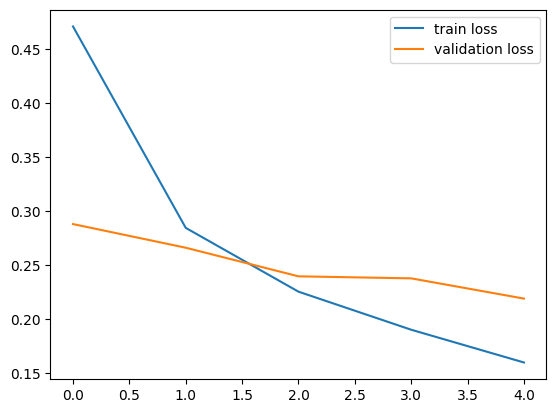

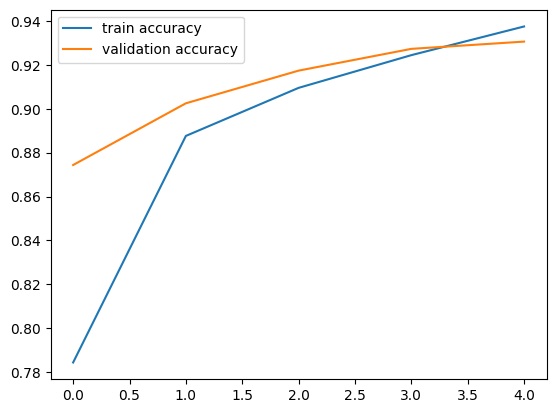

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test image 1.jpg


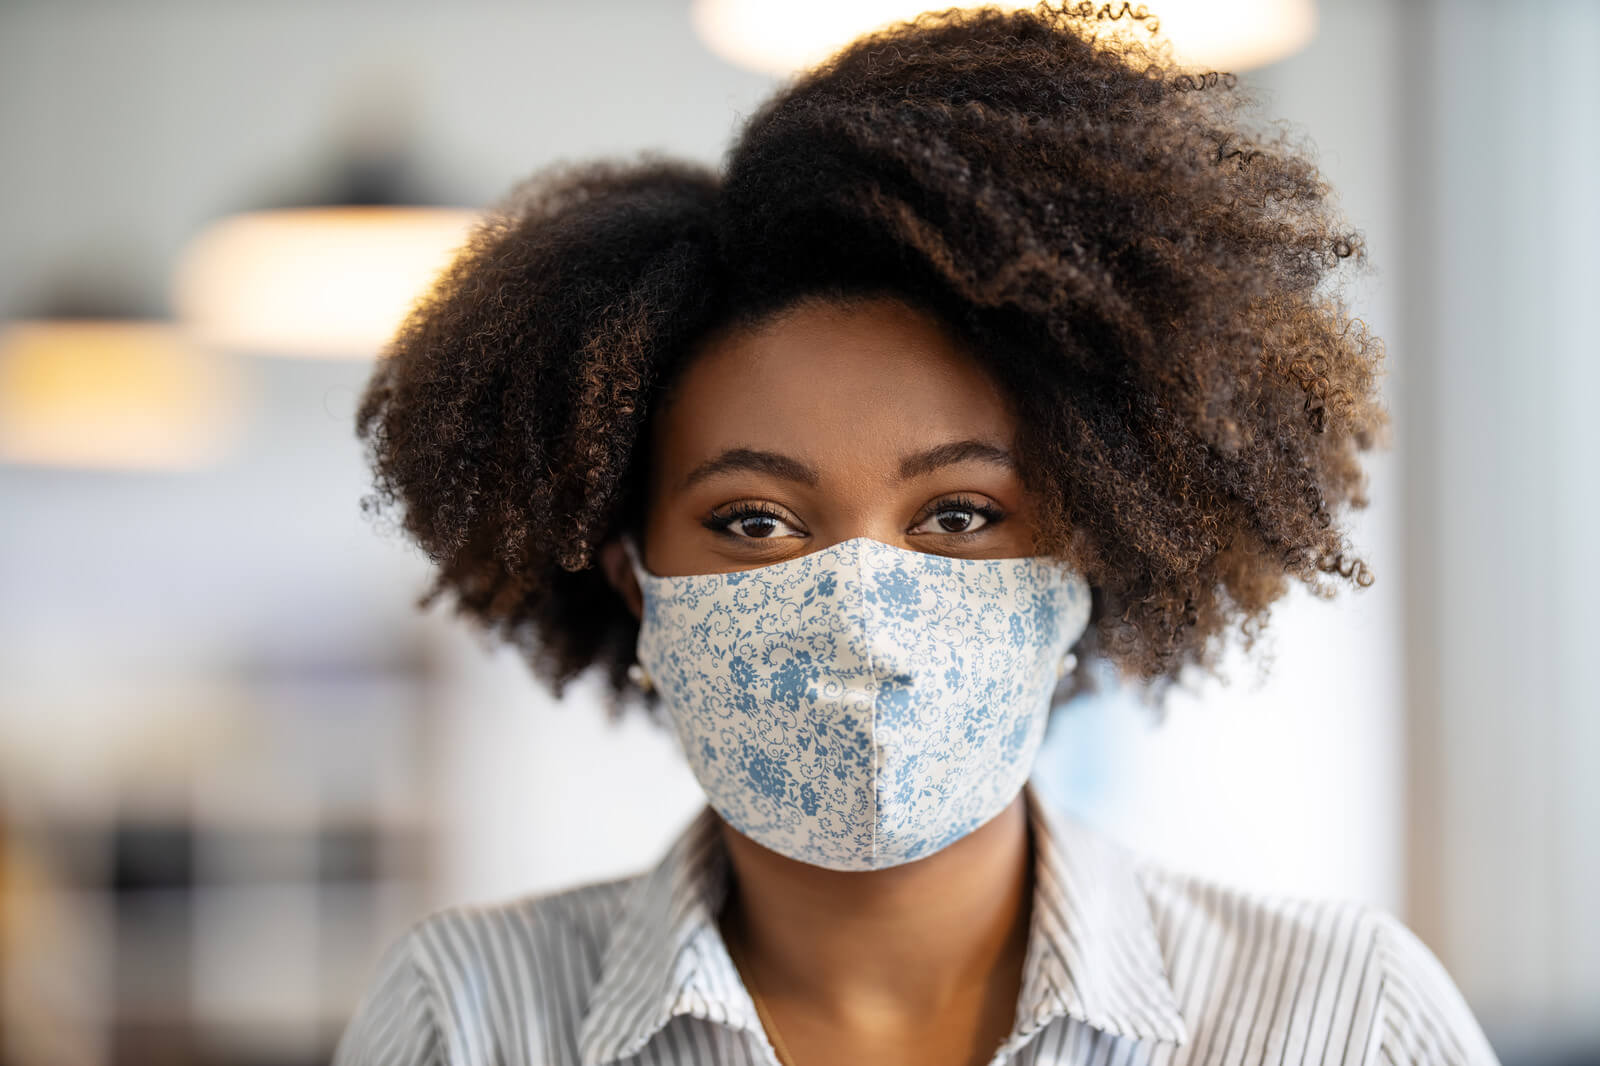

1/1 [==============================] - 0s 45ms/step
[[0.17197976 0.89575124]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test2.jpg


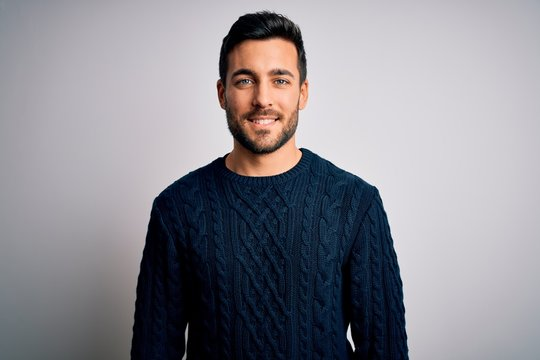

1/1 [==============================] - 0s 27ms/step
[[0.5648548  0.43132496]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')